# Variance
We seek to understand the variance of the averaged perceptron ensemble, compared to a regular perceptron and voting perceptron ensemble.

In [2]:
from tqdm.notebook import tqdm
from perceptron import Perceptron as EnsembledPerceptron, Loader
import numpy as np
from sklearn.linear_model import Perceptron
from matplotlib import pyplot as plt
from sklearn import svm, metrics, datasets
import warnings
from IPython.display import display, clear_output

def warn(*args, **kwargs):
    pass

warnings.warn = warn

In [5]:
def run_many(num_runs, epochs, title: str, train_path, test_path=None, test_size=None, dataset_name=None):
    # This should make splits in the same way as initializing an `EnsembledPerceptron`
    train_data, test_data = Loader.load(train_path, test_path, test_size)

    scores = []
    fig, ax = plt.subplots()
    display_id = display(fig, display_id=True)

    for seed in tqdm(range(num_runs)):
        normal_perceptron = Perceptron(max_iter=epochs, random_state=seed)
        normal_perceptron.fit(train_data[0], train_data[1])
        normal_score = metrics.accuracy_score(test_data[1], normal_perceptron.predict(test_data[0]))

        ensembled_perceptron = EnsembledPerceptron(trainpath=train_path, testpath=test_path, test_size=test_size, dataset_name=dataset_name)
        ensembled_perceptron.train(ensemble_size=epochs, log="none")
        ensembled_score = ensembled_perceptron.accuracies[-1]

        scores.append([normal_score, ensembled_score])

        # Update plot live
        ax.clear()
        scores_array = np.array(scores)
        ax.violinplot(scores_array, showmeans=True)
        ax.set_xticks([1, 2])
        ax.set_xticklabels(['Perceptron', 'Ensembled'])
        ax.set_title(title)
        display_id.update(fig)
        plt.pause(0.01)

    scores = np.array(scores)
    print(f"Perceptron: {scores[:, 0].mean()} ± {scores[:, 0].std()}")
    print(f"Ensembled: {scores[:, 1].mean()} ± {scores[:, 1].std()}")

    plt.ioff()
    plt.show()

    return scores

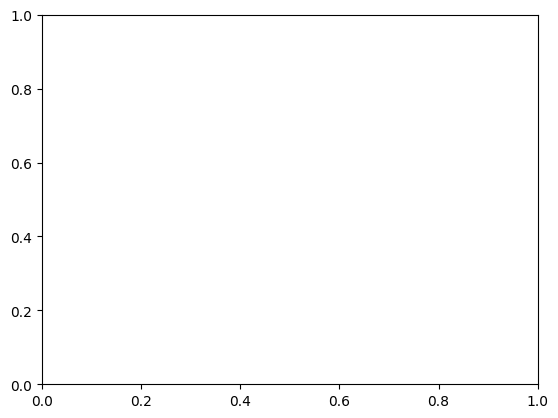

  0%|          | 0/200 [00:00<?, ?it/s]

ValueError: X has 89523 features, but Perceptron is expecting 89527 features as input.

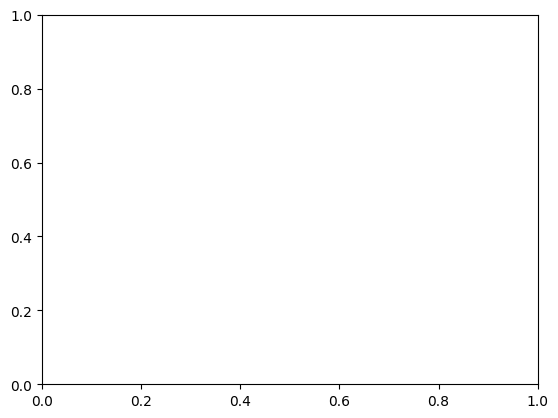

In [6]:
_ = run_many(num_runs=200,
             epochs=200,
             title="imdb",
             train_path="../data/imdb/train_labeledBow.feat",
             test_path="../data/imdb/test_labeledBow.feat",
             dataset_name="imdb")

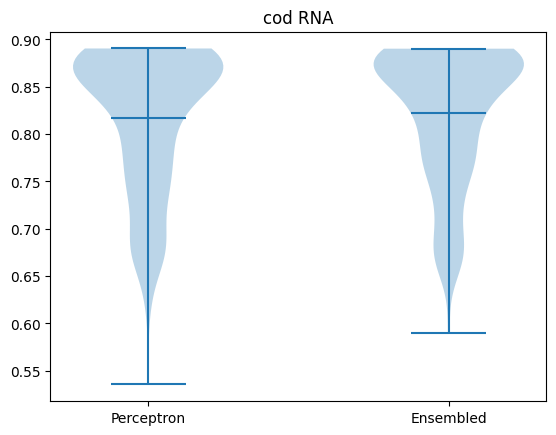

  0%|          | 0/200 [00:00<?, ?it/s]

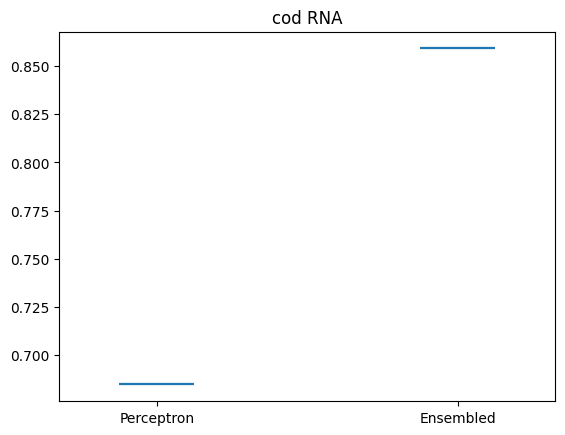

Perceptron: 0.8170143621349178 ± 0.07520177941443779
Ensembled: 0.8218217379619097 ± 0.0705435691782207


In [41]:
_ = run_many(num_runs=200,
             epochs=200,
             title="cod RNA",
             train_path="../data/cod-rna/train.txt",
             test_path="../data/cod-rna/test.txt")

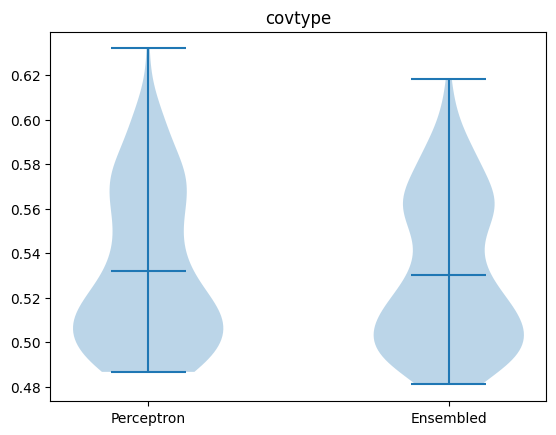

  0%|          | 0/200 [00:00<?, ?it/s]

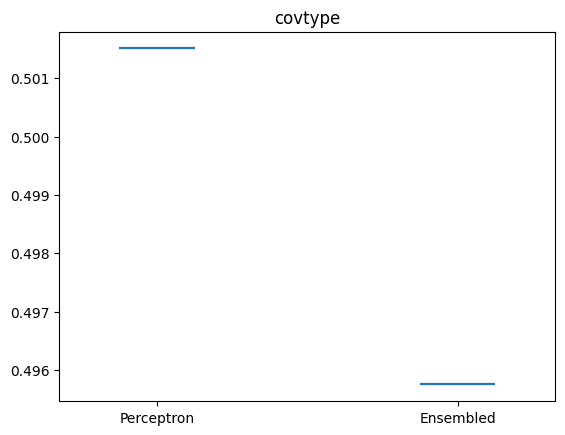

Perceptron: 0.5317618568979643 ± 0.03469201754863274
Ensembled: 0.5300025128568773 ± 0.03329759187355229


In [4]:
_ = run_many(num_runs=200,
             epochs=200,
             title="covtype",
             train_path="../data/cov/covtype.libsvm.binary")

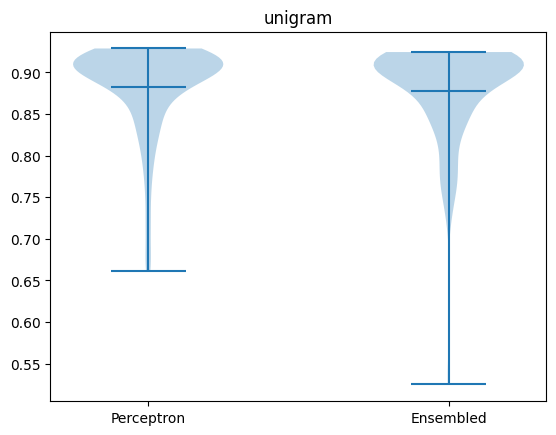

  0%|          | 0/200 [00:00<?, ?it/s]

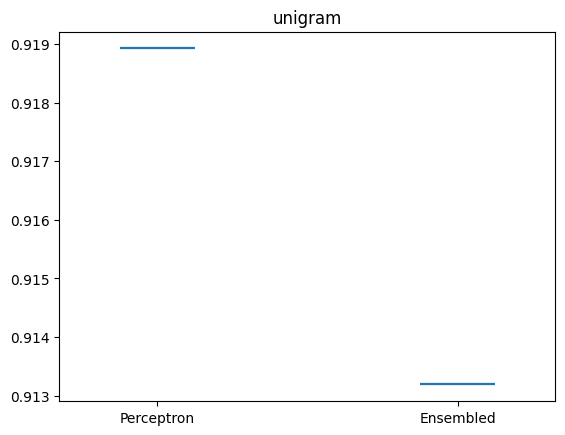

Perceptron: 0.8830777142857145 ± 0.05427828218598323
Ensembled: 0.8780449142857143 ± 0.06114093874170679


In [5]:
_ = run_many(num_runs=200,
             epochs=200,
             title="unigram",
             train_path="../data/webspam/unigram.svm")

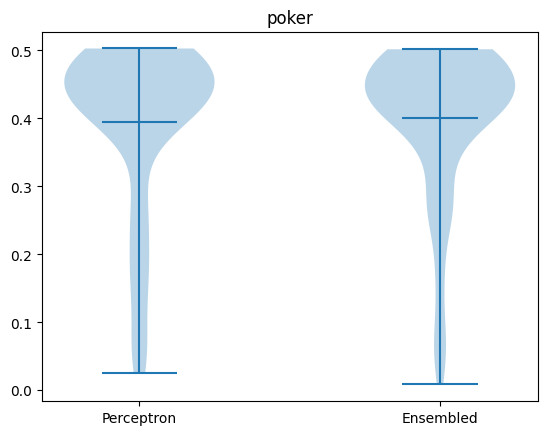

  0%|          | 0/200 [00:00<?, ?it/s]

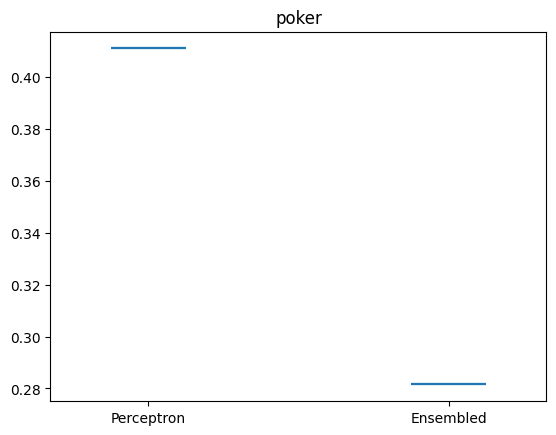

Perceptron: 0.39454506 ± 0.12405948930729323
Ensembled: 0.40014849999999996 ± 0.11095745434958391


In [6]:
_ = run_many(num_runs=200,
             epochs=200,
             title="poker",
             train_path="../data/poker/poker",
             test_path="../data/poker/poker.t")